In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import torch.optim as optim

import matplotlib.pyplot as plt

## Basics of pytorch, declaring variables and initializizing tensors...

In [2]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
y = torch.rand([2,5])
print(y)

tensor([[0.9714, 0.9272, 0.2668, 0.0698, 0.7090],
        [0.0987, 0.1435, 0.2288, 0.3056, 0.1442]])


In [5]:
y.view([1,10])    # does not update y

tensor([[0.9714, 0.9272, 0.2668, 0.0698, 0.7090, 0.0987, 0.1435, 0.2288, 0.3056,
         0.1442]])

In [ ]:
## Loading the MNIST dataset. 

In [6]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]
print(y)

tensor(5)


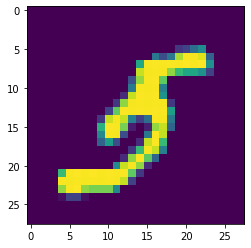

In [10]:
plt.imshow(data[0][0].view(28,28))

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
X = torch.rand((28,28))
X = X.view(1, 28*28)    
outptut = net(X)

In [13]:
print(outptut)

tensor([[-2.3366, -2.2898, -2.3325, -2.3869, -2.3571, -2.1696, -2.3545, -2.2251,
         -2.3984, -2.2045]], grad_fn=<LogSoftmaxBackward>)


In [14]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCS = 3

for epoch in range(EPOCS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(f"loss: {loss}")

loss: 0.06270365417003632
loss: 0.2986481785774231
loss: 0.0008712438866496086


## Training accuracy

In [19]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for i in range(len(output)):
            if torch.argmax(output[i]) == y[i]:
                correct += 1
            total += 1
print(f"Accuracy : {correct/total}")



Accuracy : 0.9782833333333333


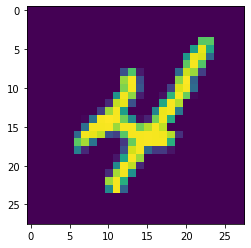

In [27]:
plt.imshow(X[3].view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(4)


## Accuracy on test set

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for i in range(len(output)):
            if torch.argmax(output[i]) == y[i]:
                correct += 1
            total += 1
print(f"Accuracy : {correct/total}")

Accuracy : 0.9684
